In [1]:
from rubin_scheduler.scheduler.example import example_scheduler
import numpy as np
import healpy as hp

from rubin_scheduler.scheduler.utils import SimTargetooServer, TargetoO
from rubin_scheduler.scheduler.model_observatory import ModelObservatory

from rubin_scheduler.scheduler import sim_runner

import matplotlib.pylab as plt
%matplotlib inline

In [11]:
# load up the example scheduler, which has ToO surveys included by default
scheduler = example_scheduler()

cat: /opt/lsst/software/stack/conda/envs/lsst-scipipe-10.0.0/lib/python3.12/site-packages/rubin_scheduler/../.git/refs/heads/main: No such file or directory


Optimizing ELAISS1
Optimizing XMM_LSS
Optimizing ECDFS
Optimizing COSMOS
Optimizing EDFS_a


/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.0.0/lib/python3.12/site-packages/rubin_scheduler/scheduler/surveys/roman_surveys.py:42: UserWarning: Generating Roman survey place holder. Should probably not be in production.
  warnings.warn("Generating Roman survey place holder. Should probably not be in production.")
/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.0.0/lib/python3.12/site-packages/rubin_scheduler/scheduler/surveys/roman_surveys.py:95: UserWarning: Generating Roman survey place holder. Should probably not be in production.
  warnings.warn("Generating Roman survey place holder. Should probably not be in production.")
/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.0.0/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 463 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.0.0/lib/python3.12/site-packages/erfa/core.py:133: Erfa

In [12]:
nside = 32
observatory = ModelObservatory(nside=nside,)# sim_to_o=sim_to_o)

In [13]:
# Make a ToO event

# Make a healpix map, can be any nside
footprint = np.zeros(hp.nside2npix(nside))
# Set some healpix near the pole to be where to observe
footprint[-8:] = 1

# Set the event to go off at the start of the survey
event_start = observatory.mjd
duration = 20 # Days

# Need to set a nominal center for the event
# could just take mean of RA,dec HEALpix map I suppose
ra_deg = 0.
dec_deg = -90.

# ToO type. Should probabably document the 
# options for this somewhere.
too_type = "lensed_BNS_case_A" 

# Unique int ID for each event
target_id = 100

event = TargetoO(
                target_id,
                footprint,
                event_start,
                duration,
                ra_rad_center=np.radians(ra_deg),
                dec_rad_center=np.radians(dec_deg),
                too_type=too_type)
# Thing to pass to the ModelObservatory so it will send out
# the ToO alert in the Conditions object
sim_to_o = SimTargetooServer([event])


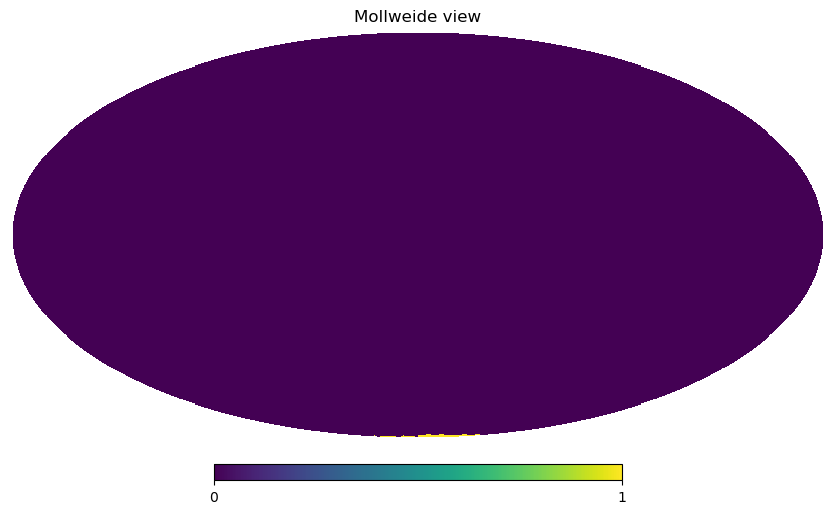

In [14]:
# here's what the target footprint looks like:
hp.mollview(footprint)

In [15]:
# model observatory with the ToO ready to go
observatory = ModelObservatory(nside=nside, sim_to_o=sim_to_o)

In [16]:
# simulate for 2 days
observatory, scheduler, observations = sim_runner(
        observatory,
        scheduler,
            sim_duration=2,
        filename=None,
        verbose=True,
    )

progress = 17.46%

/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.0.0/lib/python3.12/site-packages/rubin_scheduler/scheduler/utils/utils.py:179: UserWarning: IntRounded being used with a potentially too-small scale factor.
  warnings.warn("IntRounded being used with a potentially too-small scale factor.")
/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.0.0/lib/python3.12/site-packages/rubin_scheduler/skybrightness_pre/sky_model_pre.py:359: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn("Requested MJD between sunrise and sunset, returning closest maps")


progress = 500.33%Skipped 0 observations
Flushed 0 observations from queue for being stale
Completed 1219 observations
ran in 0 min = 0.0 hours


In [17]:
# Did we execute some ToO observaitons?
np.unique(observations["scheduler_note"])

array(['ToO, LensedBNS_A, 100_t1_i0, 1', 'ToO, LensedBNS_A, 100_t1_i0, 4',
       'ToO, LensedBNS_A, 100_t1_i1, 5', 'ToO, LensedBNS_A, 100_t1_i1, 8',
       'blob_long, gr, a', 'blob_long, gr, b', 'greedy', 'long, 1',
       'long, 10', 'long, 11', 'long, 12', 'long, 13', 'long, 14',
       'long, 15', 'long, 16', 'long, 17', 'long, 18', 'long, 19',
       'long, 2', 'long, 20', 'long, 21', 'long, 22', 'long, 23',
       'long, 24', 'long, 25', 'long, 26', 'long, 27', 'long, 28',
       'long, 29', 'long, 3', 'long, 30', 'long, 31', 'long, 32',
       'long, 33', 'long, 34', 'long, 35', 'long, 4', 'long, 5',
       'long, 6', 'long, 7', 'long, 8', 'long, 9', 'pair_15, iz, a',
       'pair_15, iz, b', 'pair_15, ri, a', 'pair_15, ri, b',
       'pair_33, gr, a', 'pair_33, gr, b', 'twilight_near_sun, 0',
       'twilight_near_sun, 1', 'twilight_near_sun, 2',
       'twilight_near_sun, 3'], dtype='<U40')

Text(0.5, 1.0, 'ToO observations')

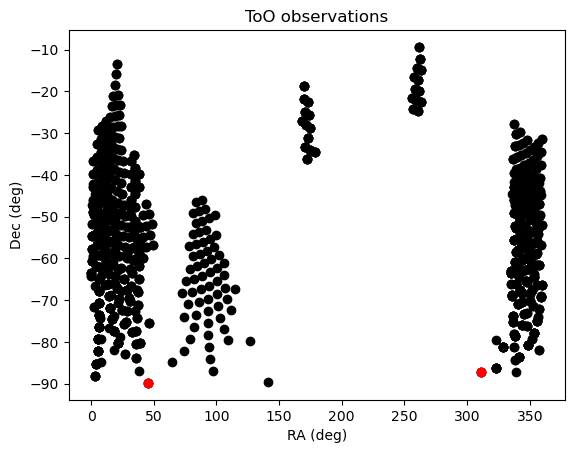

In [18]:
# Check that ToO events are where we think they should be
too_indx = ["ToO" in note for note in observations["scheduler_note"]]

fig, ax = plt.subplots()


ax.scatter(np.degrees(observations["RA"]), np.degrees(observations["dec"]), color='black')

ax.scatter(np.degrees(observations["RA"][too_indx]), np.degrees(observations["dec"][too_indx]), color="red")
ax.set_xlabel("RA (deg)")
ax.set_ylabel("Dec (deg)")
ax.set_title("ToO observations")